# **Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

# **Attribute Information**

1.Age: age of the patient

2.Sex: sex of the patient

3.ChestPainType: chest pain type

4.RestingBP: resting blood pressure

5.Cholesterol: serum cholesterol

6.FastingBS: fasting blood sugar

7.RestingECG: resting electrocardiogram results

8.MaxHR: maximum heart rate achieved

9.ExerciseAngina: exercise-induced angina

10.Oldpeak: oldpeak = ST

11.ST_Slope: the slope of the peak exercise ST segment

12.HeartDisease: output class 

In [66]:
import pandas as pd
df=pd.read_csv('/content/heart.csv')

In [67]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [68]:
df.shape

(918, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [70]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [71]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [72]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# **Data Analysis**

# 1.Count Plot

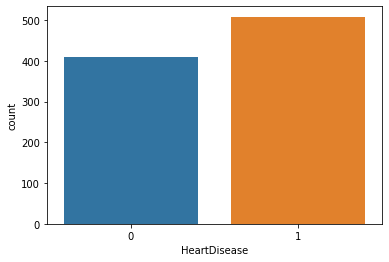

In [75]:
import seaborn as sns
sns.countplot(x='HeartDisease',data=df)

# 2.Correlation

In [76]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


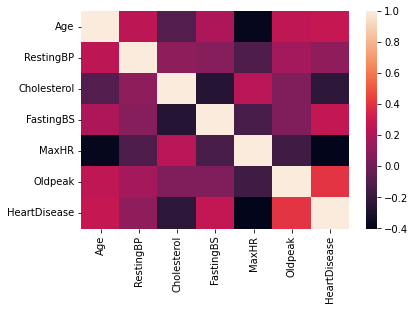

In [77]:
sns.heatmap(df.corr())

# 3.Joint Plot

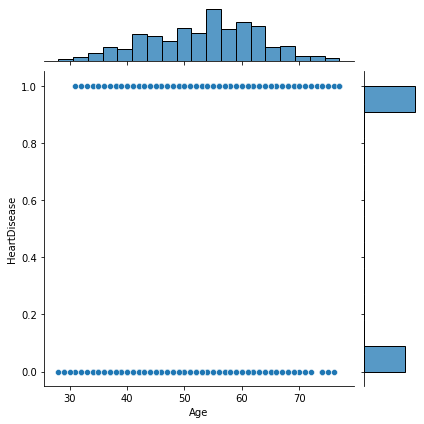

In [78]:
sns.jointplot(x='Age',y='HeartDisease',data=df)

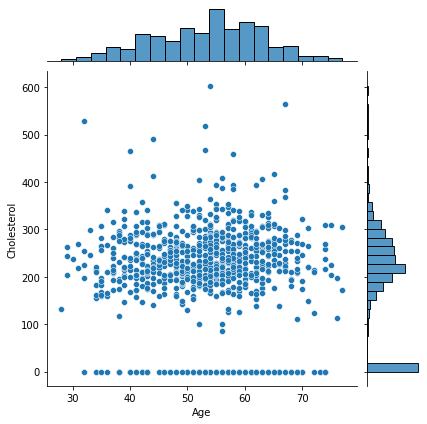

In [79]:
sns.jointplot(x='Age',y='Cholesterol',data=df)

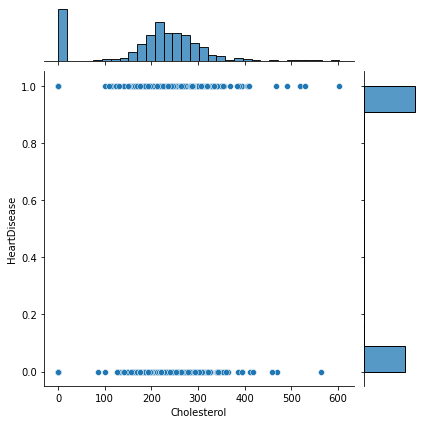

In [80]:
sns.jointplot(x='Cholesterol',y='HeartDisease',data=df)


# **Label Encoding**

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
df['Sex']=le.fit_transform(df['Sex'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


**SPLIT THE DATASET INTO FEATURES AND LABELS**

In [82]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

**DIVIDATION OF TRAINING AND TESTING DATA**


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train
X_test
y_train
y_test

900    1
570    1
791    1
189    1
372    1
      ..
66     0
395    1
355    1
277    1
604    0
Name: HeartDisease, Length: 276, dtype: int64

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train)
X_test_new=sc.transform(X_test)
X_train_new
X_test_new

array([[ 0.4923334 ,  0.51843486, -0.82602337, ..., -0.81173563,
         3.31306096, -2.35330018],
       [ 0.27738743,  0.51843486, -0.82602337, ...,  1.23192819,
         1.0653553 , -2.35330018],
       [-0.25997748,  0.51843486, -0.82602337, ...,  1.23192819,
         3.12575215, -0.66523458],
       ...,
       [ 1.45959025,  0.51843486,  2.29955819, ..., -0.81173563,
        -0.80773275, -0.66523458],
       [-0.1525045 ,  0.51843486, -0.82602337, ...,  1.23192819,
         0.59708329, -0.66523458],
       [ 1.56706323,  0.51843486,  1.25769767, ...,  1.23192819,
        -0.80773275,  1.02283103]])

**CREATING DIFFERENT MODELS USING IMBALANCED DATASET**

GRADIENT BOOSTING

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
gc.fit(X_train_new,y_train)
y_pred_gbc=gc.predict(X_test_new)
y_pred_gbc

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.8768115942028986
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.92      0.87      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



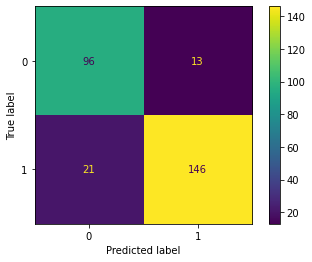

In [86]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gbc))

**KNN ALGORITHM**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_new,y_train)
y_pred_knn=knn.predict(X_test_new)
y_pred_knn

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.8623188405797102
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



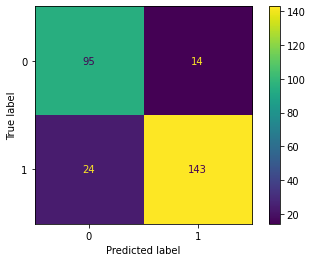

In [88]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

**SUPPORT VECTOR MACHINE ALGORITHM**

In [89]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(X_train_new,y_train)
y_pred_svm=sc.predict(X_test_new)
y_pred_svm

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.8876811594202898
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       109
           1       0.93      0.89      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276



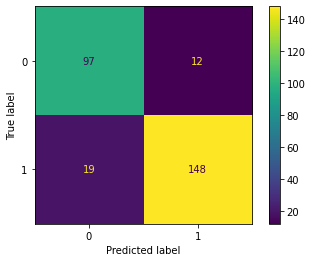

In [90]:
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm))

**DECISION TREE ALGORITHM**

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_new,y_train)
y_pred_dc=dtc.predict(X_test_new)
y_pred_dc

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.7681159420289855
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       109
           1       0.88      0.72      0.79       167

    accuracy                           0.77       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.79      0.77      0.77       276



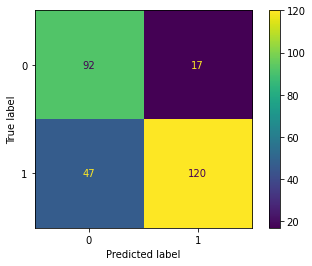

In [92]:
print(accuracy_score(y_test,y_pred_dc))
print(classification_report(y_test,y_pred_dc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dc))

**NAIVE BAYES ALGORITHM**

In [93]:
from sklearn.naive_bayes import GaussianNB
ga=GaussianNB()
ga.fit(X_train_new,y_train)
y_pred_gnb=ga.predict(X_test_new)
y_pred_gnb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

0.8405797101449275
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       109
           1       0.90      0.83      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



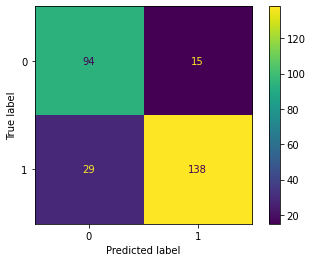

In [94]:
print(accuracy_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb))

**RANDOM FOREST ALGORITHM**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_new,y_train)
y_pred_rfc=rf.predict(X_test_new)
y_pred_rfc

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.8731884057971014
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.90      0.89      0.89       167

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



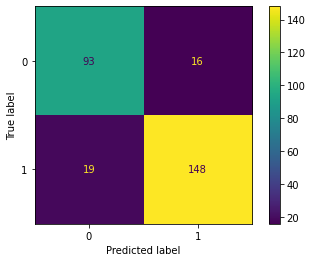

In [96]:
print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))

**DIFFERENT ALGORITHMS ON BALANCED DATASET**

*Balanced the data by oversampling technique using SMOTE(Synthetic Minority Oversampling Technique)*

In [97]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
Xo,yo=os.fit_resample(X,y)
Xo_train,Xo_test,yo_train,yo_test=train_test_split(Xo,yo,test_size=0.3,random_state=1)

In [98]:
sc=StandardScaler()
Xo_train_new=sc.fit_transform(Xo_train)
Xo_test_new=sc.transform(Xo_test)
Xo_train_new
Xo_test_new

array([[-2.08658897,  0.59521905,  0.2403254 , ..., -0.76850766,
        -0.80096935,  1.00889532],
       [-0.69236199,  0.59521905, -0.81443608, ...,  1.3012232 ,
         2.04591927, -0.67496518],
       [ 1.23810614,  0.59521905, -0.81443608, ..., -0.76850766,
         1.85612669, -0.67496518],
       ...,
       [ 0.48736854,  0.59521905,  1.29508688, ..., -0.76850766,
         2.23571184,  1.00889532],
       [-0.47786553, -1.68005376, -0.81443608, ..., -0.76850766,
        -0.80096935,  1.00889532],
       [ 0.05837562,  0.59521905, -0.81443608, ...,  1.3012232 ,
         0.52757867, -0.67496518]])

GRADIENT BOOSTING

In [99]:
gc=GradientBoostingClassifier()
gc.fit(Xo_train_new,yo_train)
y_pred_gbc_os=gc.predict(Xo_test_new)
y_pred_gbc_os

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

0.8721311475409836
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       148
           1       0.87      0.88      0.88       157

    accuracy                           0.87       305
   macro avg       0.87      0.87      0.87       305
weighted avg       0.87      0.87      0.87       305



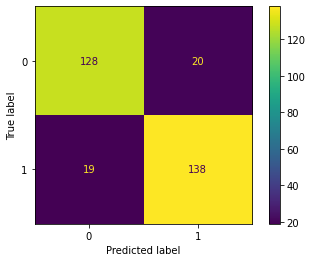

In [100]:
print(accuracy_score(yo_test,y_pred_gbc_os))
print(classification_report(yo_test,y_pred_gbc_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_gbc_os))

**KNN ALGORITHM**

In [101]:
knn=KNeighborsClassifier()
knn.fit(Xo_train_new,yo_train)
y_pred_knn_os=knn.predict(Xo_test_new)
y_pred_knn_os

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

0.839344262295082
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       148
           1       0.86      0.83      0.84       157

    accuracy                           0.84       305
   macro avg       0.84      0.84      0.84       305
weighted avg       0.84      0.84      0.84       305



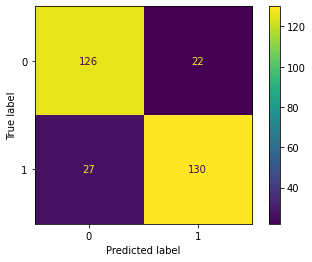

In [102]:
print(accuracy_score(yo_test,y_pred_knn_os))
print(classification_report(yo_test,y_pred_knn_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_knn_os))

**SUPPORT VECTOR MACHINE ALGORITHM**

In [103]:
sc=SVC()
sc.fit(Xo_train_new,yo_train)
y_pred_svm_os=sc.predict(Xo_test_new)
y_pred_svm_os

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

0.8524590163934426
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       148
           1       0.84      0.88      0.86       157

    accuracy                           0.85       305
   macro avg       0.85      0.85      0.85       305
weighted avg       0.85      0.85      0.85       305



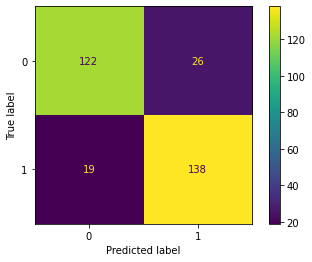

In [104]:
print(accuracy_score(yo_test,y_pred_svm_os))
print(classification_report(yo_test,y_pred_svm_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_svm_os))

**DECISION TREE ALGORITHM**

In [105]:
dtc=DecisionTreeClassifier()
dtc.fit(Xo_train_new,yo_train)
y_pred_dc_os=dtc.predict(Xo_test_new)
y_pred_dc_os

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

0.760655737704918
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       148
           1       0.81      0.69      0.75       157

    accuracy                           0.76       305
   macro avg       0.77      0.76      0.76       305
weighted avg       0.77      0.76      0.76       305



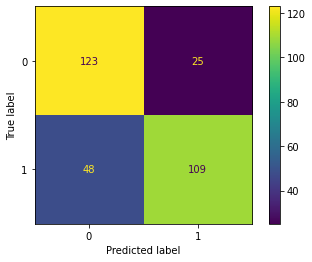

In [106]:
print(accuracy_score(yo_test,y_pred_dc_os))
print(classification_report(yo_test,y_pred_dc_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_dc_os))

**NAIVE BAYES ALGORITHM**

In [107]:
ga=GaussianNB()
ga.fit(Xo_train_new,yo_train)
y_pred_gnb_os=ga.predict(Xo_test_new)
y_pred_gnb_os

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

0.8557377049180328
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       148
           1       0.87      0.85      0.86       157

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



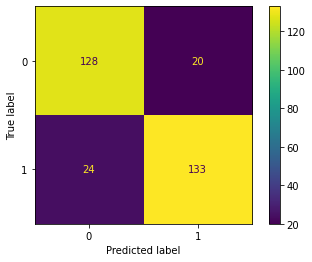

In [108]:
print(accuracy_score(yo_test,y_pred_gnb_os))
print(classification_report(yo_test,y_pred_gnb_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_gnb_os))

**RANDOM FOREST ALGORITHM**

In [109]:
rf=RandomForestClassifier()
rf.fit(Xo_train_new,yo_train)
y_pred_rfc_os=rf.predict(Xo_test_new)
y_pred_rfc_os

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

0.8622950819672132
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       148
           1       0.88      0.85      0.86       157

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



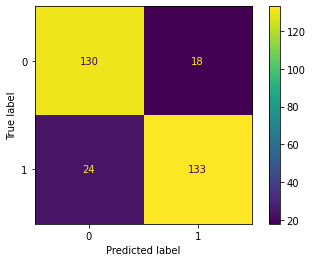

In [110]:
print(accuracy_score(yo_test,y_pred_rfc_os))
print(classification_report(yo_test,y_pred_rfc_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_rfc_os))

In [111]:
acc=pd.DataFrame()
acc['Classifier']=['GRADIENT BOOSTING','KNN','SVM','DECISION TREE','NAIVE BAYES','RANDOM FOREST']
acc['Accuracy of imbalanced data']=[accuracy_score(y_test,y_pred_gbc),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_dc),accuracy_score(y_test,y_pred_gnb),accuracy_score(y_test,y_pred_rfc)]
acc['Accuracy of balanced data']=[accuracy_score(yo_test,y_pred_gbc_os),accuracy_score(yo_test,y_pred_knn_os),accuracy_score(yo_test,y_pred_svm_os),accuracy_score(yo_test,y_pred_dc_os),accuracy_score(yo_test,y_pred_gnb_os),accuracy_score(yo_test,y_pred_rfc_os)]
acc

,Classifier,Accuracy of imbalanced data,Accuracy of balanced data
0,GRADIENT BOOSTING,0.876812,0.872131
1,KNN,0.862319,0.839344
2,SVM,0.887681,0.852459
3,DECISION TREE,0.768116,0.760656
4,NAIVE BAYES,0.840580,0.855738
5,RANDOM FOREST,0.873188,0.862295


Got highest accuracy in Gradient Boosting Classifier such  as 90%